## Prijenosna funkcija - PT1

$G(s)=\frac{K}{1 + Ts}$

In [1]:
# priprema okruženja
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from control import tf, step_response, forced_response, initial_response
import ipywidgets as ipw

In [2]:
# Prijenosna funkcija spremnika

def tf_PT1(K, T):
    return tf([K],[T, 1])

In [101]:
def plot_PT1_step(K, T):
    # slobodni odziv
    G1 = tf_PT1(K, T)
    
    t, y = step_response(G1)
    plt.figure()
    plt.hlines(K, 0, max(t), colors='g')
    plt.plot(t,y)
    plt.vlines(T, 0, K, colors='r', linestyles='dashed')
    plt.plot([0, T],[0, K],'r--')
    plt.grid()    

In [102]:
# definicija prijenosne funkcije, s parametrima K i T

G1 = tf_PT1(K=2, T=5)

G1


   2
-------
5 s + 1

<IPython.core.display.Javascript object>


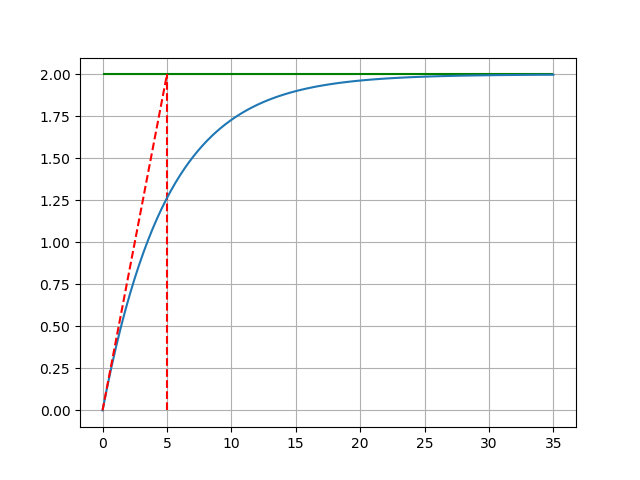

In [103]:
plot_PT1_step(K=2, T=5)

<IPython.core.display.Javascript object>


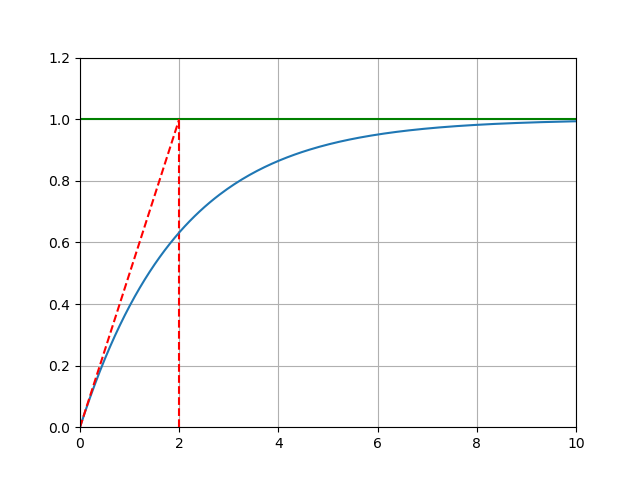

In [104]:
params = {
    'K': 1,
    'T': 2,
}
tf_label = ipw.Textarea(disabled=False)

def replot(change=None):
    if change and change.name=='value':
        params[change.owner.description] = change.new
    
    K = params['K']
    T = params['T']
    G1 = tf_PT1(**params)
    t,y = step_response(G1, np.linspace(0,10,200))    
    
    axes=fig.get_axes()[0]
    axes.clear()
    plt.hlines(K, 0, max(t), colors='g')
    axes.plot(t, y)    
    axes.plot([0, T],[0,K],'r--')
    axes.vlines(T, 0, K, colors='r', linestyles='dashed')
    axes.set_xlim(0,10)
    axes.set_ylim(0,1.2)
    axes.grid()
    
    tf_label.value=str(G1)[1:-1]

    
sliders=[
    ipw.FloatSlider(description='K', value=params['K'], min=0.1, max=1.2, step=0.01),
    ipw.FloatSlider(description='T', value=params['T'], min=1, max=10, step=0.1),
]
[slider.observe(replot) for slider in sliders]

fig = plt.figure()
fig.set_label('Odziv sustava')
plt.grid()

#plt.legend('Položaj', 'Brzina')
plt.show()

replot()
ipw.HBox([
    ipw.VBox(sliders),
    tf_label
])